## Linear Regression using sklearn
- Linear Regression is a machine learning algorithm based on supervised learning. It performs a regression task. Regression models a target prediction value based on independent variables. It is mostly used for finding out the relationship between variables and forecasting. Different regression models differ based on – the kind of relationship between the dependent and independent variables, they are considering and the number of independent variables being used.
  

In [1]:
# !pip install -q seaborn


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv('data/bottle.csv')
df_binary = df[['Salnty', 'T_degC']]

# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
df_binary.head()

C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\3992178195.py:1: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/bottle.csv')


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


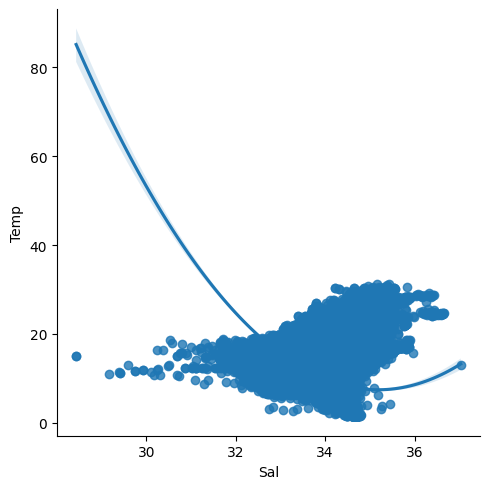

In [6]:
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x="Sal", y="Temp", data=df_binary, order=2, ci=None )
plt.show()

In [8]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method="ffill", inplace=True) #foward fill nearest values before the missing, inpace=no copy 


C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\191731812.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary.fillna(method="ffill", inplace=True) #foward fill nearest values before the missing, inpace=no copy
C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\191731812.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method="ffill", inplace=True) #foward fill nearest values before the missing, inpace=no copy


In [15]:
# Sklearn taking 2-dim data
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)


# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array 
# since each dataframe contains only one column
# Dropping any rows with Nan values
df_binary.dropna(inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

regr = LinearRegression()

regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.20328143478926142


C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\519513222.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace=True)


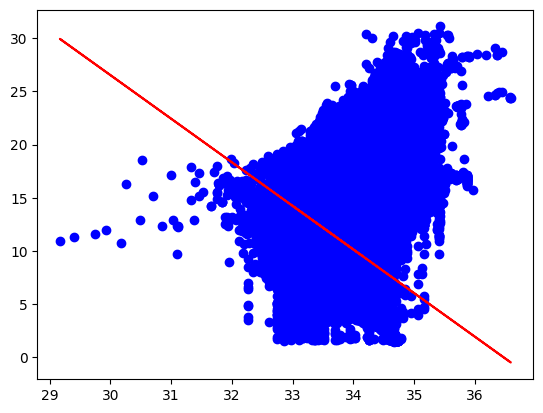

In [16]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, c='b')
plt.plot(X_test, y_pred, c='r')

plt.show()

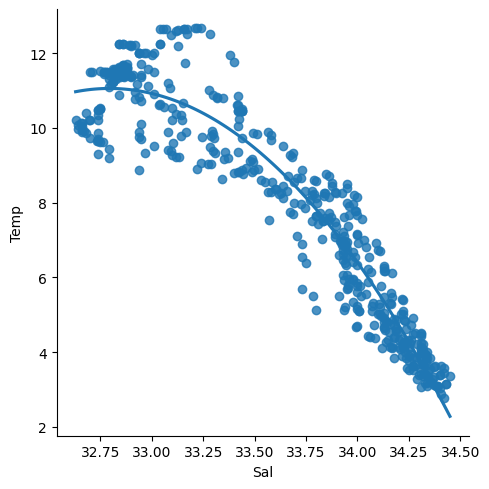

In [23]:
df_binary500 = df_binary[:500]

# Selecting the 1st 500 rows of the data
sns.lmplot(x ="Sal", y ="Temp", data=df_binary500, order=2, ci=None)

In [25]:
df_binary500.fillna(method ='ffill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.8244520694378947


C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\3697651940.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_binary500.fillna(method ='ffill', inplace = True)
C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\3697651940.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary500.fillna(method ='ffill', inplace = True)
C:\Users\Gaming\AppData\Local\Temp\ipykernel_88616\3697651940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary500.dropna(inplace = True)


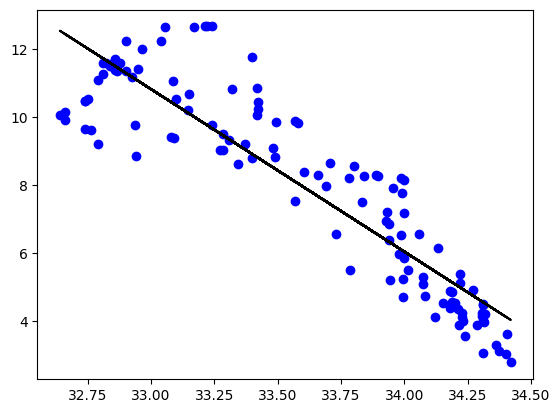

In [26]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

mae = mean_absolute_error(y_test, y_pred)

#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_test, y_pred) 
rmse = root_mean_squared_error(y_test, y_pred)
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 0.9437911321082105
MSE: 1.488083637198476
RMSE: 1.2198703362236807
